# Basic Geometry

This helps to practice creating and manipulating basic geometric objects.

### Geopandas tutorial
Tutorials from: https://geopandas.org/geometric_manipulations.html

In [35]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [8]:
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = GeoSeries([p1, p3])
# g = GeoSeries([p1, p2, p3])
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

<AxesSubplot:>

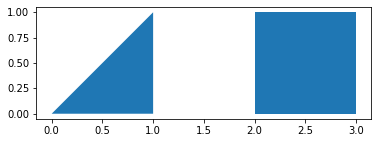

In [9]:
g.plot()

In [10]:
print(g.area) # return basic stats

0    0.5
1    1.0
dtype: float64


<AxesSubplot:>

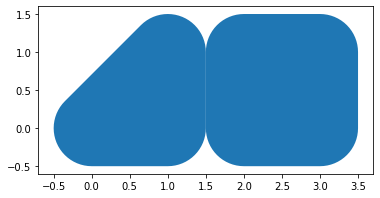

In [12]:
# buffer
g.buffer(0.5).plot() # buffer around the shapes. 

<AxesSubplot:>

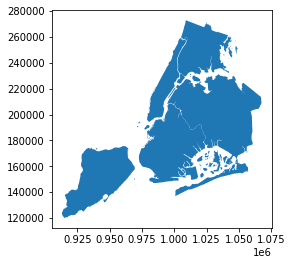

In [15]:
# convex hull
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros.plot()

<AxesSubplot:>

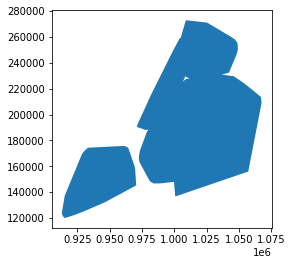

In [18]:
# plot convex hull
boros.geometry.convex_hull.plot()

<AxesSubplot:>

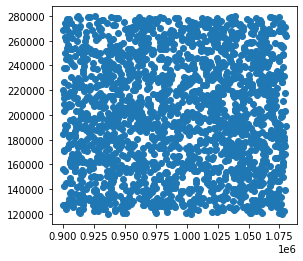

In [21]:
# generate random points.
import numpy as np
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
pts.plot()

<AxesSubplot:>

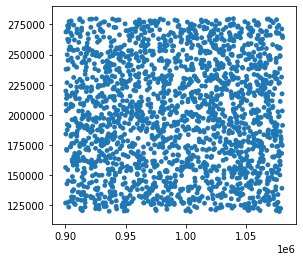

In [23]:
circles = pts.buffer(2000)
circles.plot()

In [25]:
# collapes the circles into one single geometry
mp = circles.unary_union

<AxesSubplot:>

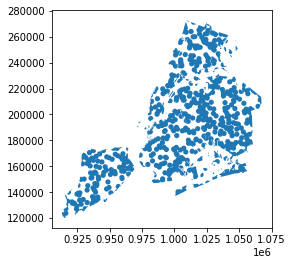

In [26]:
# intersection of boros.geometry and mp
holes = boros['geometry'].intersection(mp)
holes.plot()

<AxesSubplot:>

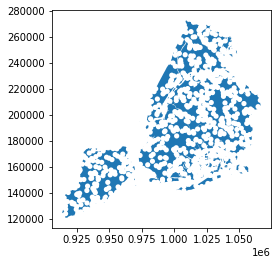

In [27]:
# difference of boros.geometry and mp
boros_with_holes = boros['geometry'].difference(mp)
boros_with_holes.plot()

### Shapely for basic geometry

From https://shapely.readthedocs.io/en/stable/manual.html#points


In [43]:
# Point
from shapely.geometry import Point

point = Point(0.0, 0.0)
q = Point((0.0,0.0))

# point attributes
print(point.area, point.length, point.bounds, point.coords, point.x, point.y)

0.0 0.0 (0.0, 0.0, 0.0, 0.0) <shapely.coords.CoordinateSequence object at 0x7f252d19a5d0> 0.0 0.0


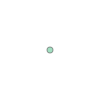

In [55]:
point 

In [32]:
# LineString
from shapely.geometry import LineString
line = LineString([(0,0), (1,1)])
print(line.area, line.length, line.bounds, line.coords)
line_1 = LineString([Point(0.0, 1.0), (2.0, 3.0), Point(4.0, 5.0)])
print(line_1.area, line_1.length, line_1.bounds, line_1.coords)

0.0 1.4142135623730951 (0.0, 0.0, 1.0, 1.0) <shapely.coords.CoordinateSequence object at 0x7f253264d690>
0.0 5.656854249492381 (0.0, 1.0, 4.0, 5.0) <shapely.coords.CoordinateSequence object at 0x7f252c065990>


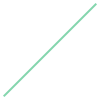

In [54]:
line # goot plot.

In [37]:
# LinearRings
from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
print(ring.area, ring.length, ring.bounds, ring.coords)

0.0 3.414213562373095 (0.0, 0.0, 1.0, 1.0) <shapely.coords.CoordinateSequence object at 0x7f25358174d0>


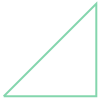

In [53]:
ring # sw Q: Why does it look like this?!

In [50]:
# Polygons
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
print(polygon.area, polygon.length, polygon.bounds, list(polygon.exterior.coords))

0.5 3.414213562373095 (0.0, 0.0, 1.0, 1.0) [(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]


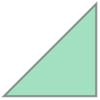

In [52]:
polygon # sw Q: Cannot plot it?! 

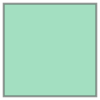

In [51]:
# Box
from shapely.geometry import box
# shapely.geometry.box(minx, miny, maxx, maxy, ccw=True)
b = box(0.0, 0.0, 1.0, 1.0)
b # b is a specific type of polygon

### Others multipoints, multilines, multipolygon, etc. are skipped.